In [189]:
import pandas as pd

#Loading the dataset
FILEPATH = "Twitter_ Non-Advert-Tabelle_1.csv" # this is the path on my machine
USECOLS = ["text", "label"]
df = pd.read_csv(filepath_or_buffer=FILEPATH, sep=';', usecols=USECOLS)
df.head()


,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1


In [190]:
#Preprocessing

#Dealing with missing values
df.isnull().sum()
df.fillna('missing', inplace=True)
df.dropna(inplace=True)

import nltk
import re
import string


def preprocess(s):
    table = str.maketrans('', '', string.punctuation)
    s = s.lower().translate(table)
    stemmer = nltk.stem.PorterStemmer()
    s = " ".join([stemmer.stem(word) for word in s.split(" ")])
    return s





In [192]:

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

best_acc = 0
best_C = 0
best_reg = ""
best_transform = ""

l1_plot = {"BOW" : [], "TFIDF" : []}
l2_plot = {"BOW" : [], "TFIDF" : []} 

def log_reg(c , penalty,  X_train, y_train, X_test, y_test, transformation): 
    global best_acc
    global best_C
    global best_reg
    global best_transform
    global l1_plot
    global l2_plot
    
    clf = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    y_train_acc = accuracy_score(y_train_pred, y_train)
    y_test_acc = accuracy_score(y_test_pred, y_test)
    if (penalty == "l1"):
        l1_plot[transformation].append(y_test_acc)
    elif (penalty == "l2"):
        l2_plot[transformation].append(y_test_acc)
        
    if y_test_acc > best_acc:
        best_acc = y_test_acc
        best_C = c
        best_reg = penalty
        best_transform = transformation
        
    print("C = %f" % c)
    print("Training accuracy: %f" % y_train_acc)
    print(classification_report(y_train_pred, y_train, digits=5))
    print("Testing accuracy: %f" % y_test_acc)
    print(classification_report(y_test_pred, y_test,digits=5))

def printLogRegResults(c_arr, penalty,  X_train, y_train, X_test, y_test, transformation):
    for c in c_arr:
        log_reg(c, penalty,  X_train, y_train, X_test, y_test, transformation)


#Set up testing and training sets
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
c_arr = [0.0001, 0.001, 0.01, 0.1, 1, 10,100] #use these C values 

In [193]:
#Bag of Words Transformation
count_vectorizer = CountVectorizer(preprocessor=preprocess)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)
print(X_train_bow.shape)
print(X_test_bow.shape)

(1435, 6470)
(616, 6470)


In [194]:
# BOW with l1 regularization
printLogRegResults(c_arr, "l1" , X_train_bow, y_train, X_test_bow, y_test, "BOW")

C = 0.000100
Training accuracy: 0.385366
              precision    recall  f1-score   support

           0    1.00000   0.38537   0.55634      1435
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.38537      1435
   macro avg    0.50000   0.19268   0.27817      1435
weighted avg    1.00000   0.38537   0.55634      1435

Testing accuracy: 0.373377
              precision    recall  f1-score   support

           0    1.00000   0.37338   0.54374       616
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.37338       616
   macro avg    0.50000   0.18669   0.27187       616
weighted avg    1.00000   0.37338   0.54374       616

C = 0.001000
Training accuracy: 0.385366
              precision    recall  f1-score   support

           0    1.00000   0.38537   0.55634      1435
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.38537      1435
   macro avg    0.5

C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\U

C = 10.000000
Training accuracy: 1.000000
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    1.00000   1.00000   1.00000      1435
weighted avg    1.00000   1.00000   1.00000      1435

Testing accuracy: 0.800325
              precision    recall  f1-score   support

           0    0.70000   0.74884   0.72360       215
           1    0.86010   0.82793   0.84371       401

    accuracy                        0.80032       616
   macro avg    0.78005   0.78838   0.78365       616
weighted avg    0.80422   0.80032   0.80179       616

C = 100.000000
Training accuracy: 1.000000
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    

In [195]:
#BOW with l2 regularization
printLogRegResults(c_arr, "l2" , X_train_bow, y_train, X_test_bow, y_test, "BOW")

C = 0.000100
Training accuracy: 0.615331
              precision    recall  f1-score   support

           0    0.00181   1.00000   0.00361         1
           1    1.00000   0.61506   0.76166      1434

    accuracy                        0.61533      1435
   macro avg    0.50090   0.80753   0.38263      1435
weighted avg    0.99930   0.61533   0.76113      1435

Testing accuracy: 0.626623
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.62662   0.77046       616

    accuracy                        0.62662       616
   macro avg    0.50000   0.31331   0.38523       616
weighted avg    1.00000   0.62662   0.77046       616

C = 0.001000
Training accuracy: 0.654355
              precision    recall  f1-score   support

           0    0.11573   0.90141   0.20513        71
           1    0.99206   0.64150   0.77916      1364

    accuracy                        0.65436      1435
   macro avg    0.5

C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    1.00000   1.00000   1.00000      1435
weighted avg    1.00000   1.00000   1.00000      1435

Testing accuracy: 0.811688
              precision    recall  f1-score   support

           0    0.69130   0.77941   0.73272       204
           1    0.88342   0.82767   0.85464       412

    accuracy                        0.81169       616
   macro avg    0.78736   0.80354   0.79368       616
weighted avg    0.81980   0.81169   0.81426       616

C = 100.000000
Training accuracy: 1.000000
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    1.00000   1.00000   1.00000      1435
weig

In [196]:
#TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [197]:
#TF-IDF with l1 regularization
printLogRegResults(c_arr, "l1" , X_train_tfidf, y_train, X_test_tfidf, y_test, "TFIDF")

C = 0.000100
Training accuracy: 0.385366
              precision    recall  f1-score   support

           0    1.00000   0.38537   0.55634      1435
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.38537      1435
   macro avg    0.50000   0.19268   0.27817      1435
weighted avg    1.00000   0.38537   0.55634      1435

Testing accuracy: 0.373377
              precision    recall  f1-score   support

           0    1.00000   0.37338   0.54374       616
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.37338       616
   macro avg    0.50000   0.18669   0.27187       616
weighted avg    1.00000   0.37338   0.54374       616

C = 0.001000
Training accuracy: 0.385366
              precision    recall  f1-score   support

           0    1.00000   0.38537   0.55634      1435
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.38537      1435
   macro avg    0.5

C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\U

C = 100.000000
Training accuracy: 1.000000
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    1.00000   1.00000   1.00000      1435
weighted avg    1.00000   1.00000   1.00000      1435

Testing accuracy: 0.798701
              precision    recall  f1-score   support

           0    0.69130   0.75000   0.71946       212
           1    0.86269   0.82426   0.84304       404

    accuracy                        0.79870       616
   macro avg    0.77700   0.78713   0.78125       616
weighted avg    0.80371   0.79870   0.80051       616



In [198]:
#TF-IDF with l2 regularization
printLogRegResults(c_arr, "l2" , X_train_tfidf, y_train, X_test_tfidf, y_test, "TFIDF")

C = 0.000100
Training accuracy: 0.614634
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.61463   0.76133      1435

    accuracy                        0.61463      1435
   macro avg    0.50000   0.30732   0.38066      1435
weighted avg    1.00000   0.61463   0.76133      1435

Testing accuracy: 0.626623
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.62662   0.77046       616

    accuracy                        0.62662       616
   macro avg    0.50000   0.31331   0.38523       616
weighted avg    1.00000   0.62662   0.77046       616

C = 0.001000
Training accuracy: 0.614634
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.61463   0.76133      1435

    accuracy                        0.61463      1435
   macro avg    0.5

C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gh2222\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\U

              precision    recall  f1-score   support

           0    0.99819   0.98046   0.98925       563
           1    0.98753   0.99885   0.99316       872

    accuracy                        0.99164      1435
   macro avg    0.99286   0.98966   0.99120      1435
weighted avg    0.99171   0.99164   0.99162      1435

Testing accuracy: 0.814935
              precision    recall  f1-score   support

           0    0.66087   0.80851   0.72727       188
           1    0.90674   0.81776   0.85995       428

    accuracy                        0.81494       616
   macro avg    0.78380   0.81313   0.79361       616
weighted avg    0.83170   0.81494   0.81946       616

C = 100.000000
Training accuracy: 1.000000
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       553
           1    1.00000   1.00000   1.00000       882

    accuracy                        1.00000      1435
   macro avg    1.00000   1.00000   1.00000      1435
weig

0.8198051948051948 100 l2 TFIDF


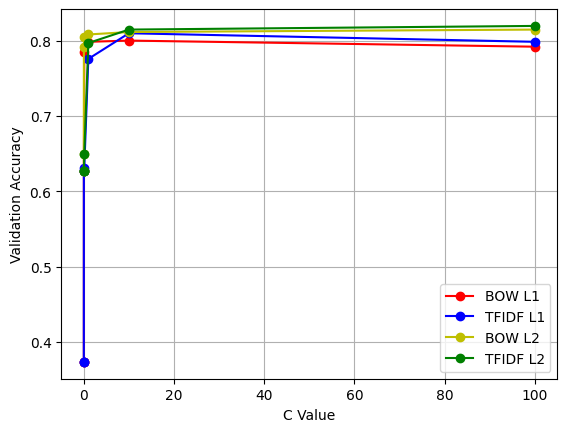

In [199]:
print(best_acc, best_C, best_reg, best_transform)

import matplotlib
import matplotlib.pyplot as plt
plt.plot(c_arr, l1_plot["BOW"], 'ro-')
plt.plot(c_arr, l1_plot["TFIDF"], 'bo-')
plt.plot(c_arr, l2_plot["BOW"], 'yo-')
plt.plot(c_arr, l2_plot["TFIDF"], 'go-')
plt.grid()
plt.xlabel("C Value")
plt.ylabel("Validation Accuracy")
plt.legend(['BOW L1', 'TFIDF L1', 'BOW L2', 'TFIDF L2'], loc='lower right')